In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/Loan_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.drop("Loan_ID",axis = 1,inplace = True)

In [8]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [9]:
data_map = {"Y":1,"N":0}
df["loan_status"]= df["Loan_Status"].map(data_map)
df.drop("Loan_Status",axis = 1,inplace = True)

In [10]:
df_final = pd.get_dummies(df,drop_first = True)
df_final.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,loan_status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1


In [11]:
df_final.shape

(614, 15)

In [12]:
df_final.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
loan_status                 0
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [13]:
df_final = df_final.fillna(0)

In [14]:
x = df_final.drop("loan_status",axis = 1)
y = df_final["loan_status"].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [15]:
x.shape

(614, 14)

In [16]:
y.shape

(614,)

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
ovr_sampling = SMOTE()

In [19]:
x,y = ovr_sampling.fit_resample(x,y)

In [20]:
from collections import Counter 

In [21]:
count = Counter(y)
print(count)

Counter({1: 422, 0: 422})


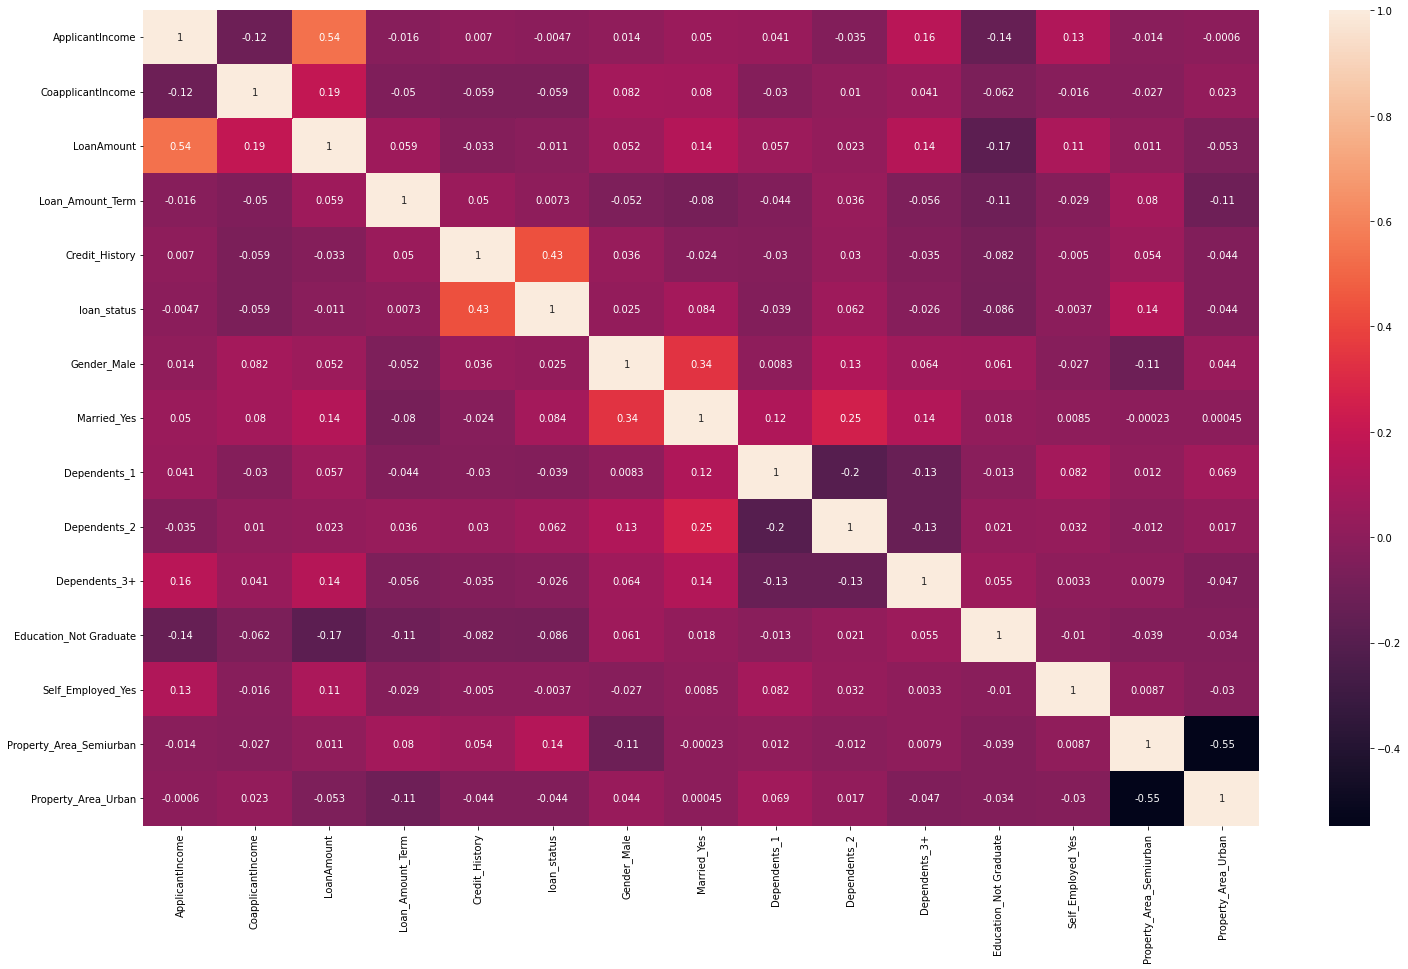

In [22]:
corr = df_final.corr()
plt.figure(figsize = (25,15))
sns.heatmap(corr,annot = True)

#Explore categorical Variables

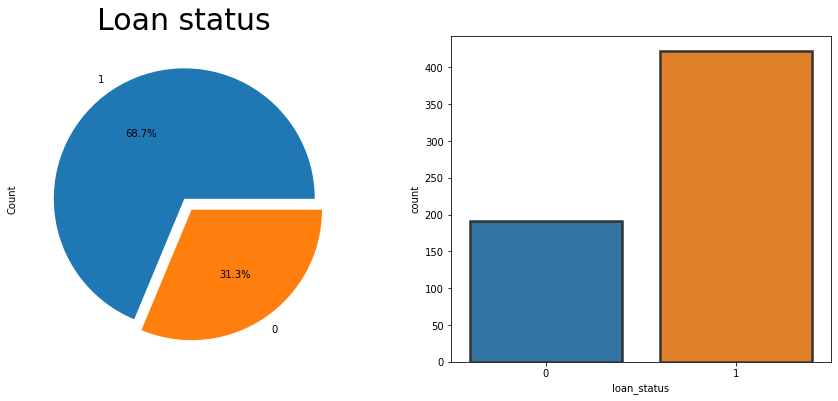

In [23]:
f,ax=plt.subplots(1,2,figsize=(15,6))
df['loan_status'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],autopct='%1.1f%%')
ax[0].set_title('Loan status',fontsize=30)
ax[0].set_ylabel('Count')
sns.set_style("whitegrid")
sns.countplot(x = 'loan_status',linewidth=2.5,edgecolor=".2",data=df)
plt.ioff()

#Visualing the categorical features

Loan eligibility by merital status

Married  loan_status
Yes      1              285
No       1              134
Yes      0              113
No       0               79
dtype: int64


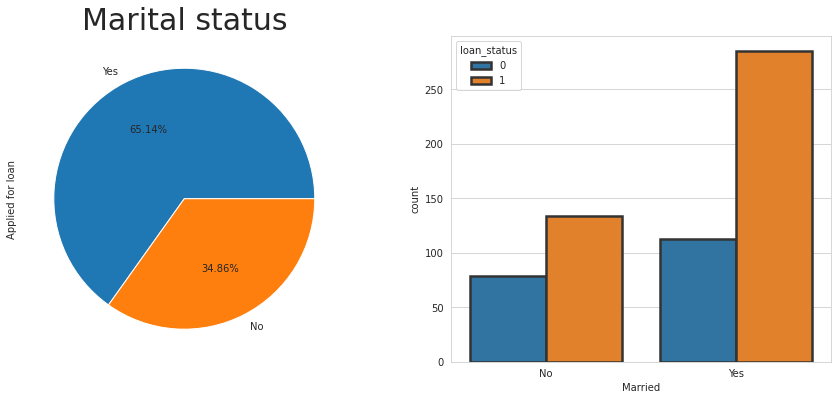

In [24]:
f,ax = plt.subplots(1,2, figsize = (15,6))
df["Married"].value_counts().plot.pie(ax = ax[0],autopct = "%1.2f%%")
ax[0].set_title("Marital status",fontsize = 30)
ax[0].set_ylabel("Applied for loan")
sns.set_style("whitegrid")
sns.countplot(x = 'Married',hue="loan_status",ax=ax[1],linewidth=2.5,data = df,edgecolor=".2")
plt.ioff()
x = df[["Married","loan_status"]].value_counts()
print(x)

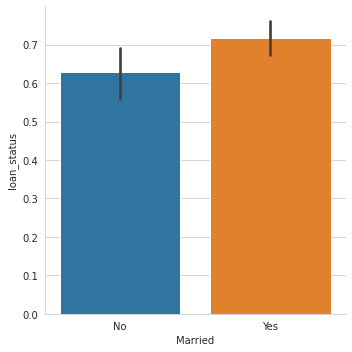

In [25]:
sns.catplot(x = "Married" , y = "loan_status" , kind = "bar" ,data = df)

#Loan Eligibility by Education

Education     loan_status
Graduate      1              340
              0              140
Not Graduate  1               82
              0               52
dtype: int64

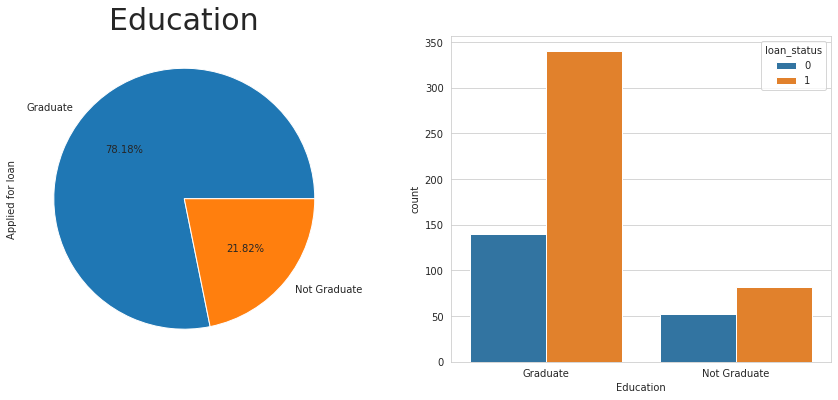

In [26]:
f,ax = plt.subplots(1,2,figsize = (15,6))
df["Education"].value_counts().plot.pie(ax=ax[0],autopct="%1.2f%%")
ax[0].set_title("Education",fontsize = 30)
ax[0].set_ylabel("Applied for loan")
sns.set_style('whitegrid')
sns.countplot(x = "Education",hue = "loan_status",data = df,ax=ax[1])
df[["Education","loan_status"]].value_counts()

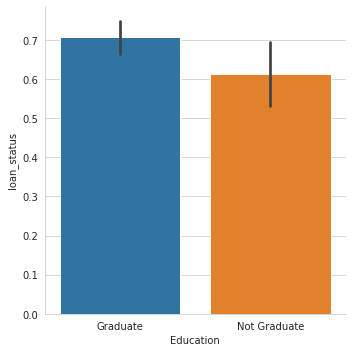

In [27]:
sns.catplot(x = "Education" , y = "loan_status" , kind = "bar" ,data = df)

#Loan Eligibility by type of Residence

Property_Area  loan_status
Semiurban      1              179
Urban          1              133
Rural          1              110
               0               69
Urban          0               69
Semiurban      0               54
dtype: int64

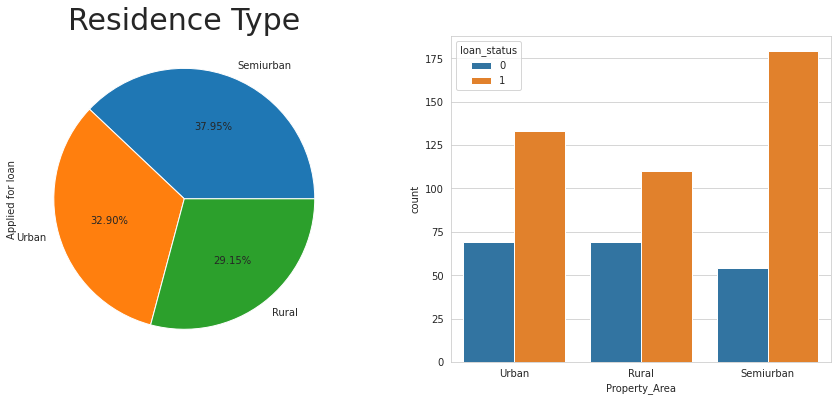

In [28]:
f,ax = plt.subplots(1,2, figsize = (15,6))
df["Property_Area"].value_counts().plot.pie(ax=ax[0], autopct ="%1.2f%%")
ax[0].set_title("Residence Type",fontsize = 30)
ax[0].set_ylabel("Applied for loan")
sns.set_style("whitegrid")
sns.countplot(x = "Property_Area",hue = "loan_status",data = df, ax=ax[1])
df[["Property_Area","loan_status"]].value_counts()

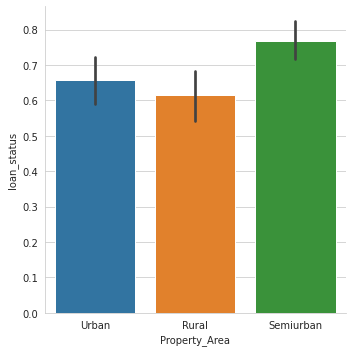

In [29]:
sns.catplot(x = "Property_Area", y = "loan_status", kind="bar", data = df)

#Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

In [32]:
param_grid = {
              "criterion":["gini","entropy"],
              "max_depth":randint(1,5),
              "max_features":randint(1,14)
}

In [33]:
model1 = DecisionTreeClassifier()

In [34]:
random_search = RandomizedSearchCV(estimator = model1 , param_distributions = param_grid , cv = 10,n_iter = 20)

In [35]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fee39fb66d0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fee3860cad0>})

In [36]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features=12)

In [37]:
random_search.best_score_*100

76.95652173913044